In [1]:
import tensorflow as tf
# tf.__version__
mnist = tf.keras.datasets.mnist # 28 x 28 images of hand-written digits 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

/home/ar0058/Ash/venv3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ar0058/Ash/venv3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ar0058/Ash/venv3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ar0058/Ash/venv3.6/lib/python3.6/site-packages/tensorflow/python/frame

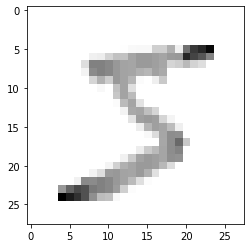

In [3]:
import matplotlib.pyplot as plt
# plt.imshow(x_train[0])
# plt.imshow(x_train[0], cmap = plt.cm.binary)
# plt.show()
# print(x_train[0])
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
# print(x_train[0])
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # two rectified linear unit activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output is 10 digits from 0-9
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
model.fit(x_train, y_train, epochs=3)

W1206 16:44:21.293976 140204855052032 deprecation.py:506] From /home/ar0058/Ash/venv3.6/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/3
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2646 - acc: 0.9228
Epoch 2/3
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1103 - acc: 0.9665
Epoch 3/3
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0753 - acc: 0.9768


In [5]:
val_loss, val_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.0960 - acc: 0.9708


In [6]:
model.save('epic.model')

In [7]:
new_model = tf.keras.models.load_model('epic.model')

W1206 16:44:51.398794 140204855052032 deprecation.py:506] From /home/ar0058/Ash/venv3.6/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1206 16:44:51.403276 140204855052032 deprecation.py:506] From /home/ar0058/Ash/venv3.6/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1206 16:44:51.515926 140204855052032 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstar

In [8]:
predictions = new_model.predict([x_test])

AttributeError: 'list' object has no attribute 'shape'